# Problem Statement

Laptop Price Prediction

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [2]:
data = pd.read_csv("laptop_data_cleaned.csv")
data

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,8,1.37,11.175755,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,10.776777,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,10.329931,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,11.814476,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,11.473101,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,Asus,Notebook,4,2.20,10.555257,0,0,100.454670,Intel Core i7,500,0,Nvidia,Windows
1269,Lenovo,2 in 1 Convertible,4,1.80,10.433899,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1270,Lenovo,2 in 1 Convertible,16,1.30,11.288115,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1271,Lenovo,Notebook,2,1.50,9.409283,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows


# Domain Analysis

### Data that contains Laptop details
- Company : Name of the Brand
- TypeName : Type of Laptop	
- Ram : RAM(Random Access Memory) storage (in GB) 
- Weight : Weight of the Laptop
- Price : Price of the Laptop **(y)**
- TouchScreen : Whether the laptop is touchscreen or not
- Ips : IPS(In-Plane Switching), type of monitor display and screen technology.
- Ppi : PPI(Pixel Per Inch), how many pixels will be “used” per inch of the display 
- Cpu_brand : Brand of CPU
- HDD : HDD(Hard Disk Drive), storage disk, which uses a moving read/write head to access data. 
- SSD : SSD(Solid State Drive), faster, no-motion, and more efficient secondary storage.
- Gpu_brand : Brand of GPU
- Os : Type of Operating System

It is a regression problem because the data is continuous.

# Basic checks

- shape
- size
- ndim
- columns
- dtypes
- unique()
- value_counts()
- head()
- tail()
- info()
- describe()
- sample()
- groupby()
- sort_values()

In [3]:
data.shape

(1273, 13)

In [4]:
data.size

16549

In [5]:
data.columns

Index(['Company', 'TypeName', 'Ram', 'Weight', 'Price', 'TouchScreen', 'Ips',
       'Ppi', 'Cpu_brand', 'HDD', 'SSD', 'Gpu_brand', 'Os'],
      dtype='object')

In [6]:
data.describe()

,Ram,Weight,Price,TouchScreen,Ips,Ppi,HDD,SSD
count,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000
mean,8.447761,2.041100,10.828218,0.146897,0.279654,146.950812,413.715632,186.252946
std,5.098771,0.669241,0.619565,0.354142,0.449006,42.926775,518.054486,186.531571
min,2.000000,0.690000,9.134616,0.000000,0.000000,90.583402,0.000000,0.000000
25%,4.000000,1.500000,10.387379,0.000000,0.000000,127.335675,0.000000,0.000000
50%,8.000000,2.040000,10.872255,0.000000,0.000000,141.211998,0.000000,256.000000
75%,8.000000,2.310000,11.287447,0.000000,1.000000,157.350512,1000.000000,256.000000
max,64.000000,4.700000,12.691441,1.000000,1.000000,352.465147,2000.000000,1024.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1273 entries, 0 to 1272
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1273 non-null   object 
 1   TypeName     1273 non-null   object 
 2   Ram          1273 non-null   int64  
 3   Weight       1273 non-null   float64
 4   Price        1273 non-null   float64
 5   TouchScreen  1273 non-null   int64  
 6   Ips          1273 non-null   int64  
 7   Ppi          1273 non-null   float64
 8   Cpu_brand    1273 non-null   object 
 9   HDD          1273 non-null   int64  
 10  SSD          1273 non-null   int64  
 11  Gpu_brand    1273 non-null   object 
 12  Os           1273 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 129.4+ KB


In [8]:
data.Company.unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [9]:
data.TypeName.unique()

array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

In [10]:
data.Ram.unique()

array([ 8, 16,  4,  2, 12,  6, 32, 24, 64], dtype=int64)

In [11]:
data.TouchScreen.unique()

array([0, 1], dtype=int64)

In [12]:
data.Ips.unique()

array([1, 0], dtype=int64)

In [13]:
data.Cpu_brand.unique()

array(['Intel Core i5', 'Intel Core i7', 'AMD Processor', 'Intel Core i3',
       'Other Intel Processor'], dtype=object)

In [14]:
data.HDD.unique()

array([   0,  500, 1000, 2000,   32,  128], dtype=int64)

In [15]:
data.SSD.unique()

array([ 128,    0,  256,  512,   32,   64, 1000, 1024,   16,  768,  180,
        240,    8], dtype=int64)

In [19]:
only_columns= ['Company', 'TypeName', 'Ram', 'TouchScreen', 'Ips', 'Cpu_brand', 'HDD', 'SSD', 'Gpu_brand', 'Os']

for column in only_columns:
    unique_values = data[column].unique()
    print(f'{column}:{unique_values}')

Company:['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']
TypeName:['Ultrabook' 'Notebook' 'Netbook' 'Gaming' '2 in 1 Convertible'
 'Workstation']
Ram:[ 8 16  4  2 12  6 32 24 64]
TouchScreen:[0 1]
Ips:[1 0]
Cpu_brand:['Intel Core i5' 'Intel Core i7' 'AMD Processor' 'Intel Core i3'
 'Other Intel Processor']
HDD:[   0  500 1000 2000   32  128]
SSD:[ 128    0  256  512   32   64 1000 1024   16  768  180  240    8]
Gpu_brand:['Intel' 'AMD' 'Nvidia']
Os:['Mac' 'Others' 'Windows']


In [20]:
data.Company.value_counts()

Dell         291
Lenovo       289
HP           268
Asus         151
Acer         101
MSI           54
Toshiba       48
Apple         21
Samsung        8
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

In [21]:
value_columns = ['Company', 'TypeName', 'Ram', 'TouchScreen', 'Ips', 'Cpu_brand', 'HDD', 'SSD', 'Gpu_brand', 'Os']

for column in value_columns:
    value_counts = data[column].value_counts()
    print(f'{column}: {value_counts}')

Company: Dell         291
Lenovo       289
HP           268
Asus         151
Acer         101
MSI           54
Toshiba       48
Apple         21
Samsung        8
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64
TypeName: Notebook              706
Gaming                205
Ultrabook             194
2 in 1 Convertible    116
Workstation            29
Netbook                23
Name: TypeName, dtype: int64
Ram: 8     613
4     365
16    198
6      35
12     25
32     17
2      16
24      3
64      1
Name: Ram, dtype: int64
TouchScreen: 0    1086
1     187
Name: TouchScreen, dtype: int64
Ips: 0    917
1    356
Name: Ips, dtype: int64
Cpu_brand: Intel Core i7            515
Intel Core i5            423
Other Intel Processor    141
Intel Core i3            134
AMD Processor             60
Name: Cpu_brand, dtype: int64
HDD: 0       714
1000    400

In [22]:
data.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,8,1.37,11.175755,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,10.776777,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,10.329931,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,11.814476,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,11.473101,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [23]:
data.tail()

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
1268,Asus,Notebook,4,2.20,10.555257,0,0,100.454670,Intel Core i7,500,0,Nvidia,Windows
1269,Lenovo,2 in 1 Convertible,4,1.80,10.433899,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1270,Lenovo,2 in 1 Convertible,16,1.30,11.288115,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1271,Lenovo,Notebook,2,1.50,9.409283,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1272,HP,Notebook,6,2.19,10.614129,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [24]:
data.sample(10)

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
959,Acer,2 in 1 Convertible,4,1.25,9.939140,1,1,135.094211,Other Intel Processor,0,0,Intel,Others
955,Dell,Gaming,16,4.36,12.031988,0,1,254.671349,Intel Core i7,1000,512,Nvidia,Windows
975,HP,Notebook,8,2.04,10.862093,0,1,141.211998,Intel Core i5,1000,128,Nvidia,Windows
787,Lenovo,Gaming,4,2.40,10.882316,0,1,141.211998,Intel Core i7,1000,0,Nvidia,Windows
64,HP,Notebook,8,1.86,10.512253,0,0,141.211998,Intel Core i5,0,256,Intel,Windows
1135,Lenovo,Notebook,16,2.50,10.977717,0,0,141.211998,Intel Core i7,0,0,AMD,Windows
522,Dell,Notebook,8,1.64,11.129965,0,0,157.350512,Intel Core i5,0,256,Intel,Windows
232,Lenovo,Gaming,16,3.20,11.288115,0,1,141.211998,Intel Core i7,1000,256,Nvidia,Windows
204,Dell,Workstation,16,2.80,12.000096,0,0,282.423996,Other Intel Processor,1000,256,Nvidia,Windows
408,Lenovo,Notebook,4,2.20,9.989276,0,0,141.211998,Intel Core i3,500,0,Intel,Windows


In [25]:
data.Os.value_counts()

Windows    1100
Others      152
Mac          21
Name: Os, dtype: int64

# Exploratory Data Analysis
1) Univariate - histogram, countplot, displot
2) Bivariate - scatterplot, lineplot
3) Multivariate - pairplot
- Visualizations

### Univariate

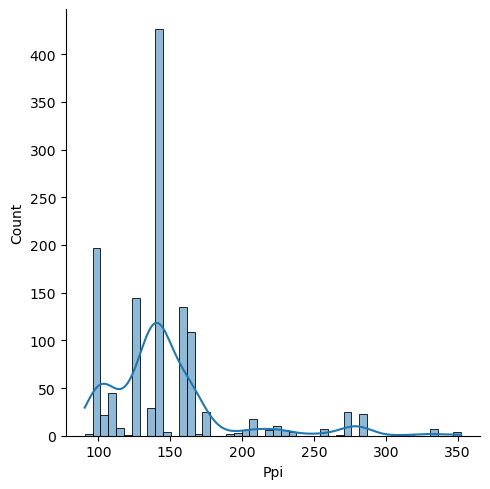

In [26]:
sns.displot(x='Ppi',data=data,kde=True)
plt.show()

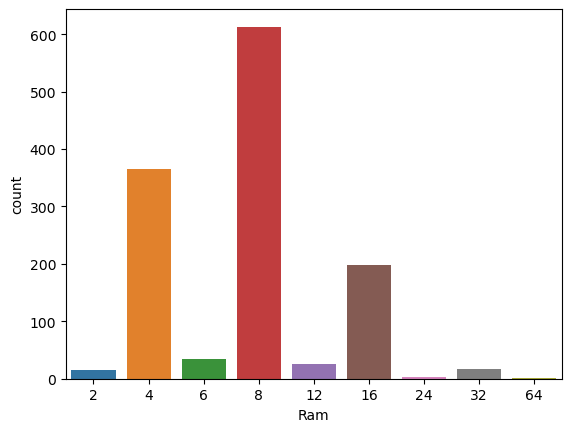

In [27]:
sns.countplot(x='Ram',data=data)
plt.show()

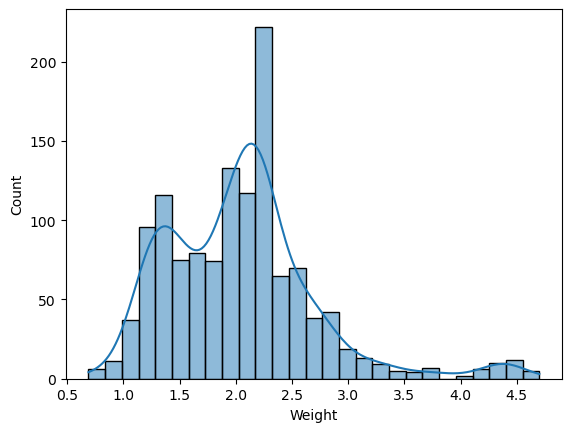

In [28]:
sns.histplot(x='Weight',data=data,kde=True)
plt.show()

In [29]:
data.columns

Index(['Company', 'TypeName', 'Ram', 'Weight', 'Price', 'TouchScreen', 'Ips',
       'Ppi', 'Cpu_brand', 'HDD', 'SSD', 'Gpu_brand', 'Os'],
      dtype='object')

In [30]:
data1 = data[['Company', 'TypeName', 'Ram', 'TouchScreen', 'Ips','Cpu_brand', 'HDD', 'SSD', 'Gpu_brand', 'Os']]
data2 = data[['Weight','Ppi']]
data3 = data['Price']

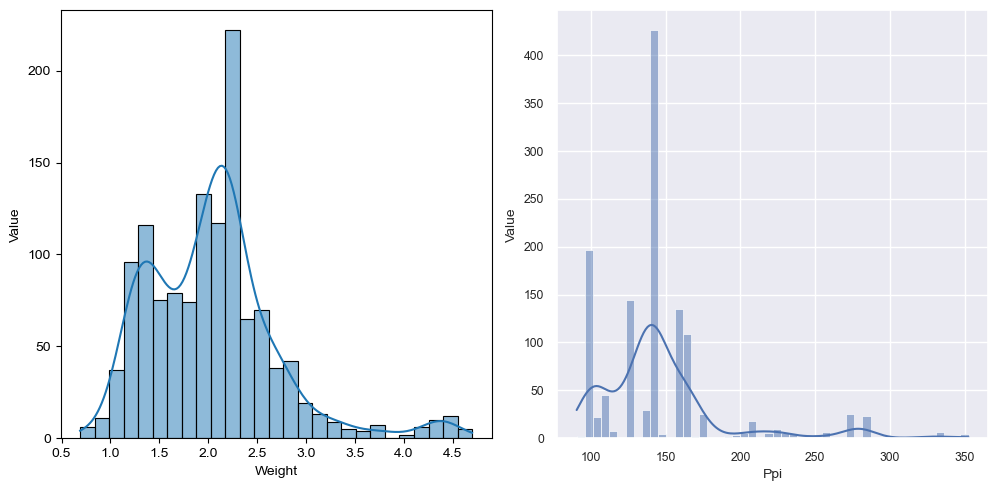

In [31]:
plt.figure(figsize=(20,5), facecolor='white') # canva size
plotnumber = 1

for column in data2:
    if plotnumber<=4:
        ax = plt.subplot(1,4,plotnumber)
        sns.histplot(x=data[column],kde=True)
        sns.set(font_scale=0.8)
        plt.xlabel(column,fontsize=10)
        plt.ylabel('Value',fontsize=10)
    plotnumber+=1
plt.tight_layout()

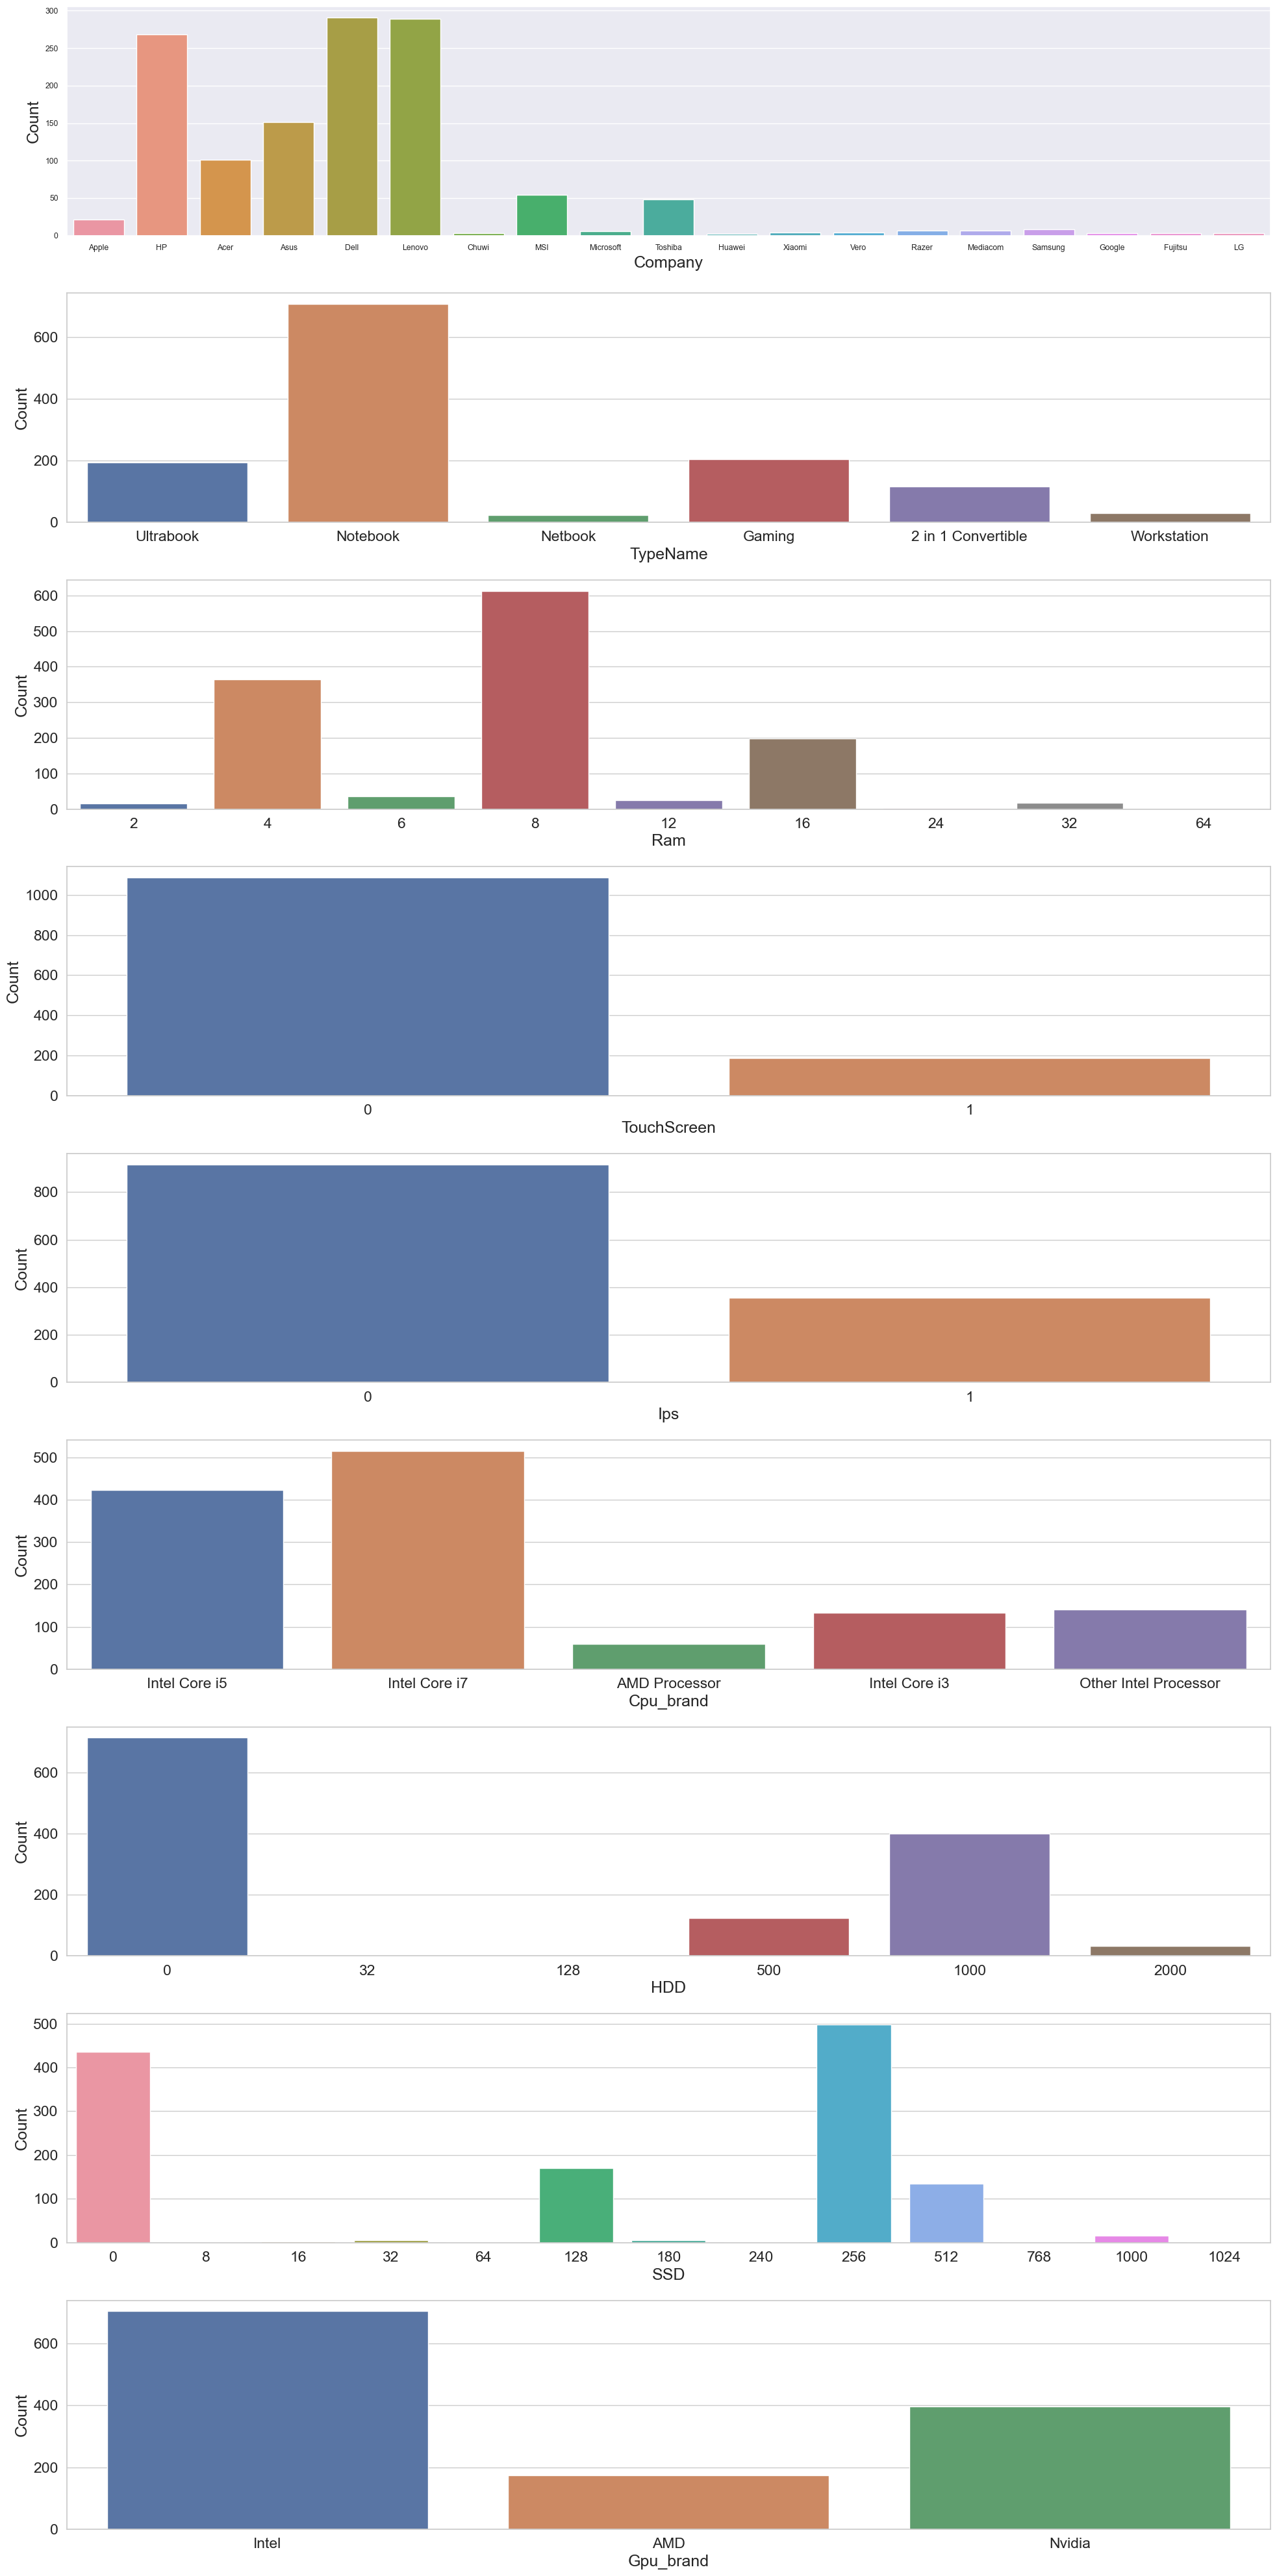

In [32]:
plt.figure(figsize=(20,40), facecolor='white') # canva size
plotnumber = 1

for column in data1:
    if plotnumber<=9:
        ax = plt.subplot(9,1,plotnumber)
        sns.set(style="whitegrid", font_scale=1.5)
        sns.countplot(x=data[column])
        plt.xlabel(column,fontsize=18)
        plt.ylabel('Count',fontsize=18)
    plotnumber+=1
plt.tight_layout()

### Bivariate analysis

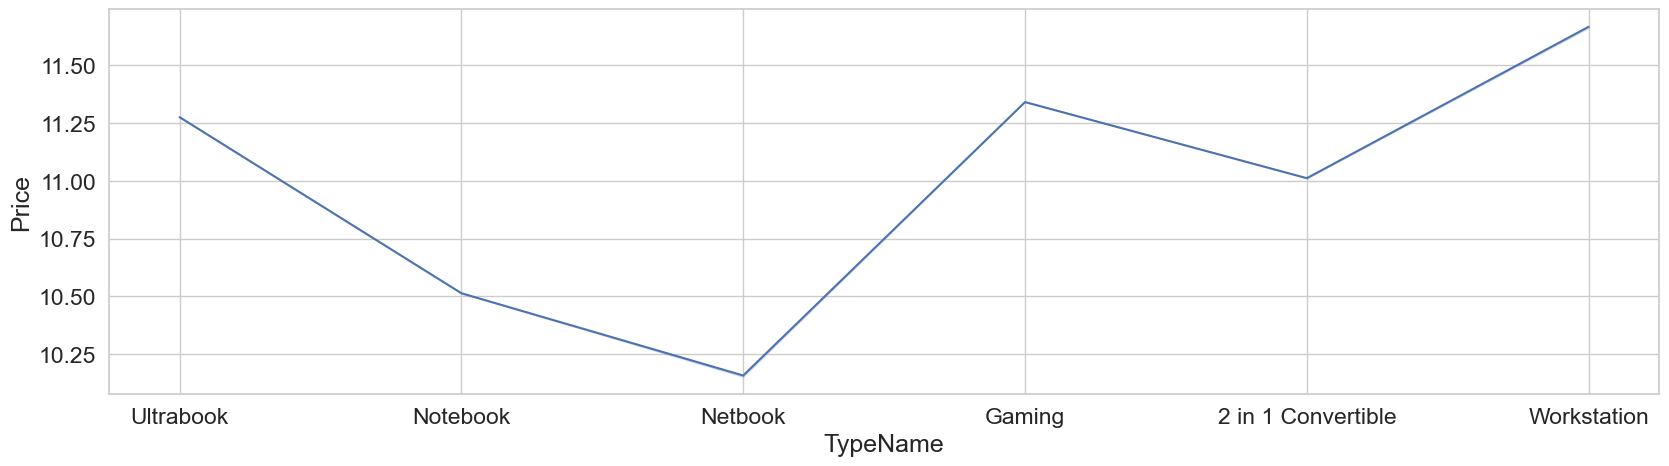

In [33]:
plt.figure(figsize=(20,5), facecolor='white')
sns.lineplot(x='TypeName',y='Price',data=data,ci=True)
plt.show()

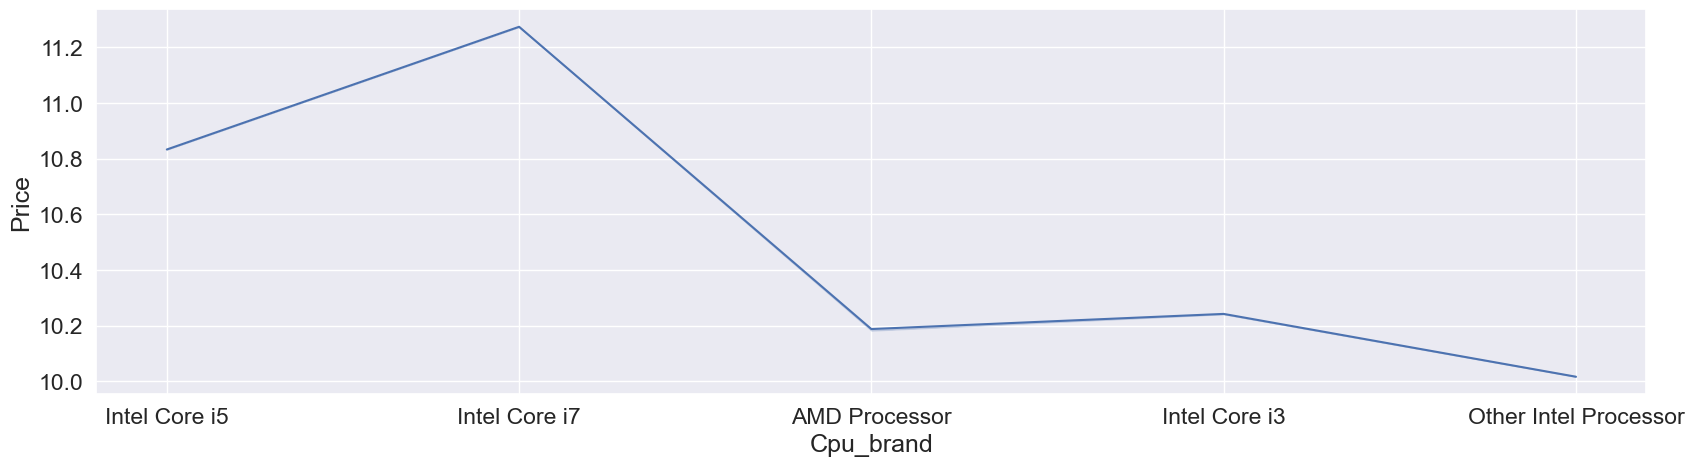

In [34]:
plt.figure(figsize=(20,5), facecolor='white')
sns.set(font_scale=1.5)
sns.lineplot(x='Cpu_brand',y='Price',data=data,ci=True)
plt.show()

<Axes: xlabel='Company', ylabel='Ram'>

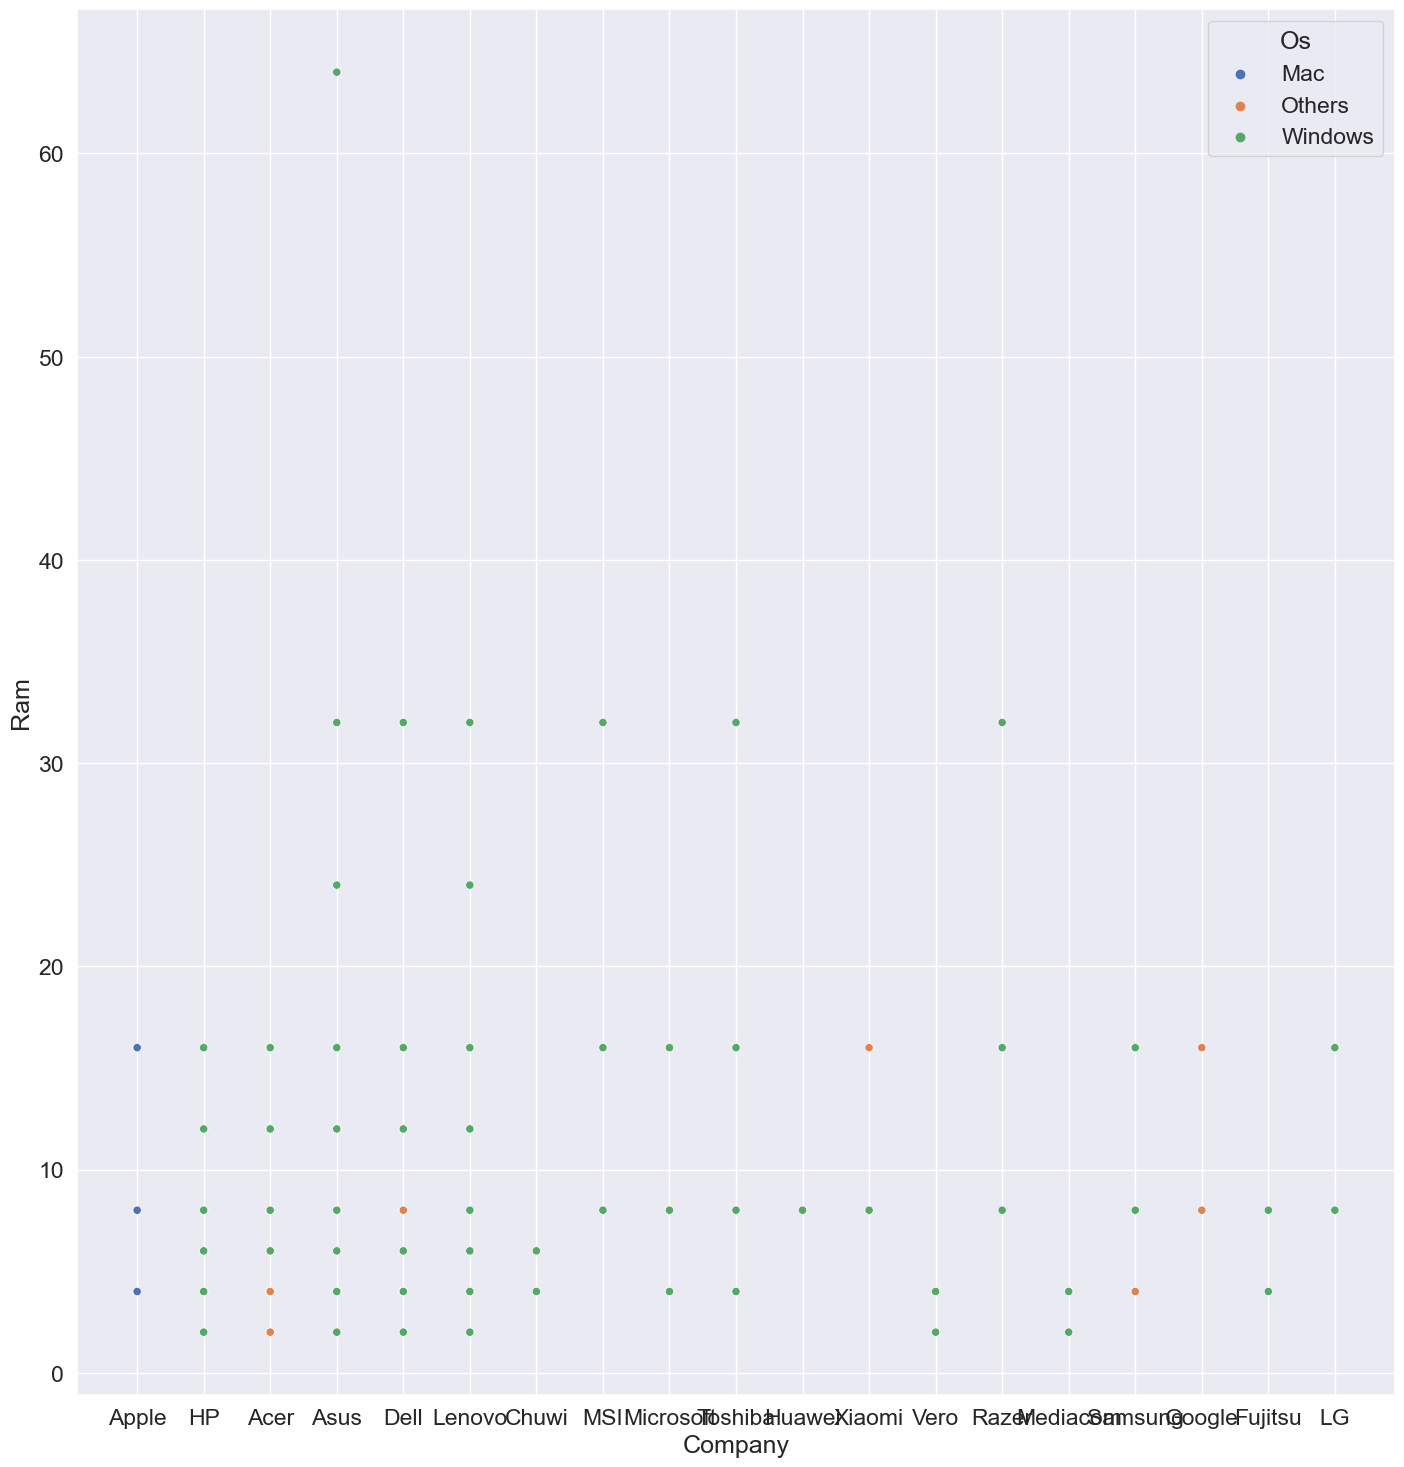

In [35]:
plt.figure(figsize=(17,18))
sns.scatterplot(data=data, x='Company',y='Ram',hue='Os')

In [36]:
data

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,8,1.37,11.175755,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,10.776777,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,10.329931,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,11.814476,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,11.473101,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,Asus,Notebook,4,2.20,10.555257,0,0,100.454670,Intel Core i7,500,0,Nvidia,Windows
1269,Lenovo,2 in 1 Convertible,4,1.80,10.433899,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1270,Lenovo,2 in 1 Convertible,16,1.30,11.288115,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1271,Lenovo,Notebook,2,1.50,9.409283,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows


### Multivariate Analysis

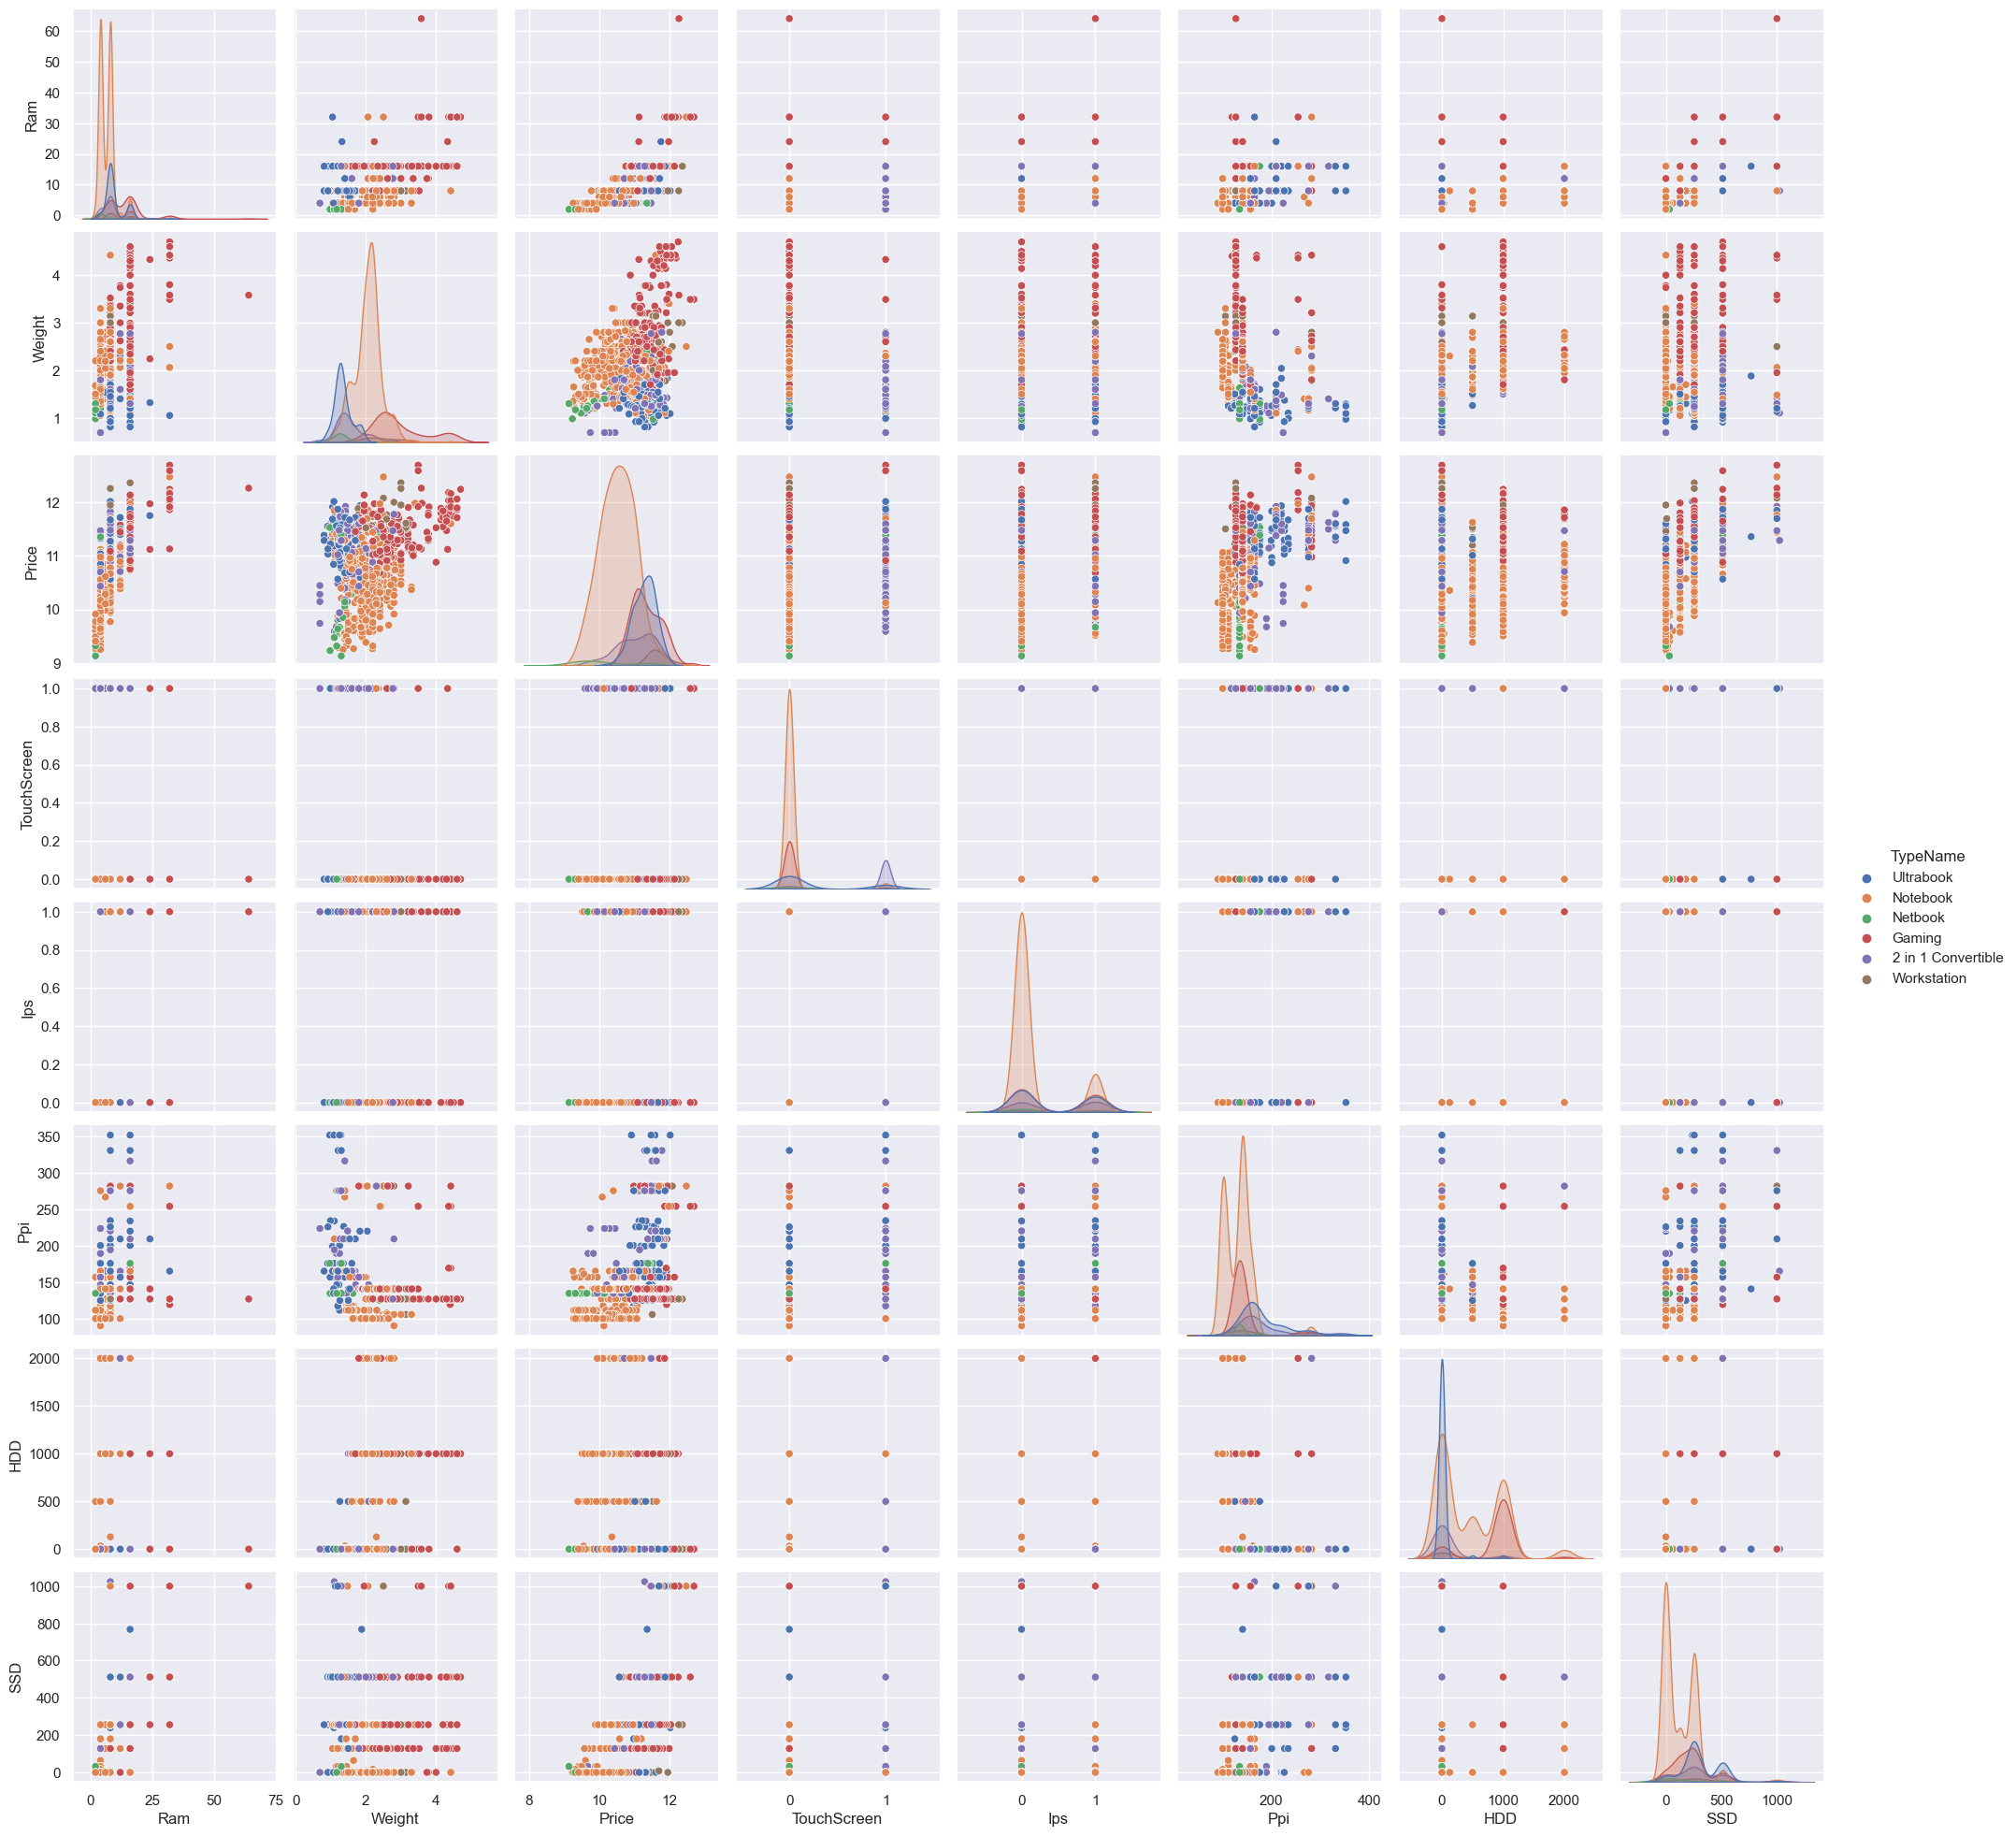

In [37]:
sns.set(font_scale=1)
sns.pairplot(data=data,hue='TypeName')
plt.show()

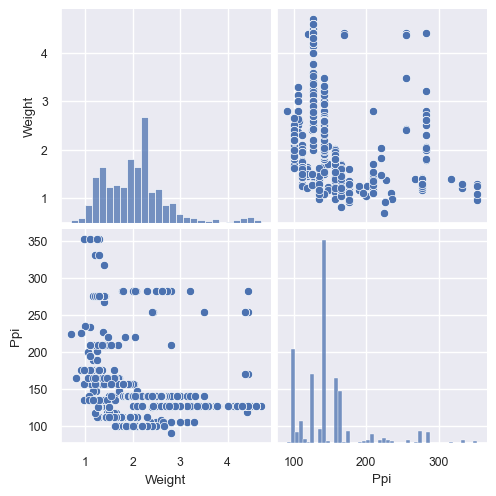

In [38]:
sns.set(font_scale=0.8)
sns.pairplot(data=data2)
plt.show()

# Data Preprocessing
1) Missing Values - isnull().sum() and fillna.
2) Duplicates
3) Outliers
4) Scaling
5) Encoding

### Missing values

In [17]:
data.isnull().sum()

Company        0
TypeName       0
Ram            0
Weight         0
Price          0
TouchScreen    0
Ips            0
Ppi            0
Cpu_brand      0
HDD            0
SSD            0
Gpu_brand      0
Os             0
dtype: int64

### Duplicates

In [39]:
data.duplicated().sum()

1

In [40]:
data.loc[data.duplicated()]

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
1004,Toshiba,Notebook,4,1.2,11.061462,0,0,165.632118,Intel Core i5,0,128,Intel,Windows


In [41]:
df = data.drop_duplicates()

In [42]:
df.duplicated().sum()

0

In [43]:
df.loc[data.duplicated()]

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os


In [44]:
df

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,8,1.37,11.175755,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,10.776777,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,10.329931,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,11.814476,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,11.473101,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,Asus,Notebook,4,2.20,10.555257,0,0,100.454670,Intel Core i7,500,0,Nvidia,Windows
1269,Lenovo,2 in 1 Convertible,4,1.80,10.433899,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1270,Lenovo,2 in 1 Convertible,16,1.30,11.288115,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1271,Lenovo,Notebook,2,1.50,9.409283,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows


In [45]:
df.head(10)

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,8,1.37,11.175755,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,10.776777,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,10.329931,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,11.814476,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,11.473101,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
5,Acer,Notebook,4,2.10,9.967026,0,0,100.454670,AMD Processor,500,0,AMD,Windows
6,Apple,Ultrabook,16,2.04,11.644108,0,1,220.534624,Intel Core i7,0,0,Intel,Mac
7,Apple,Ultrabook,8,1.34,11.030615,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
8,Asus,Ultrabook,16,1.30,11.285443,0,0,157.350512,Intel Core i7,0,512,Nvidia,Windows
9,Acer,Ultrabook,8,1.60,10.621952,0,1,157.350512,Intel Core i5,0,256,Intel,Windows


### Outliers

In [ ]:
data.d

In [46]:
df1 = data[['Ram', 'TouchScreen', 'Ips', 'HDD', 'SSD',]]
df2 = data[['Weight','Ppi']]

<Axes: xlabel='Ram'>

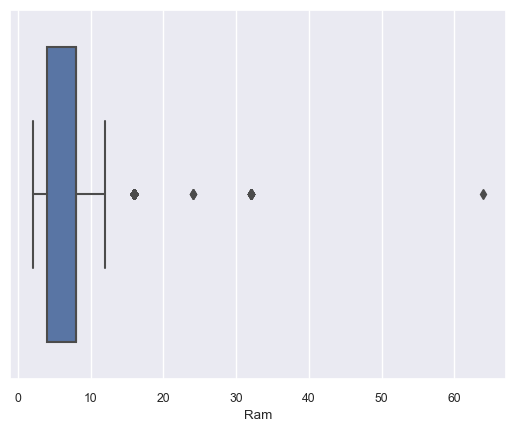

In [47]:
sns.boxplot(data=df,x='Ram')

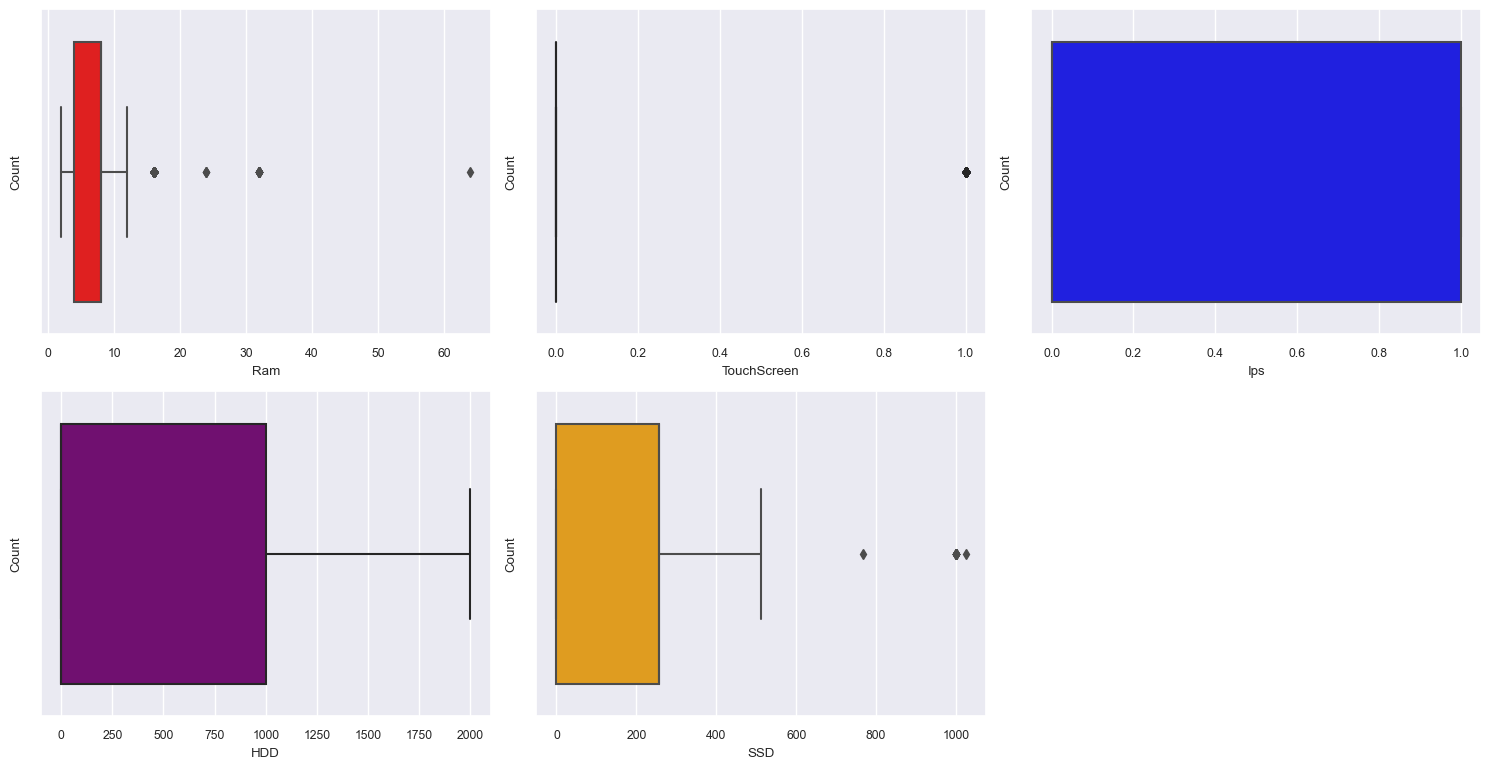

In [48]:
plt.figure(figsize=(15, 15), facecolor='white')
plotnumber = 1

# Define a color palette for the box plots
colors = ['red', 'green', 'blue', 'purple', 'orange', 'pink', 'brown', 'gray', 'cyan', 'magenta', 'teal']

for column in df1:
    if plotnumber < 12:
        plt.subplot(4, 3, plotnumber)
        sns.boxplot(x=df1[column], color=colors[plotnumber - 1])
        plt.xlabel(column)
        plt.ylabel('Count')
    plotnumber += 1

plt.tight_layout()
plt.show()

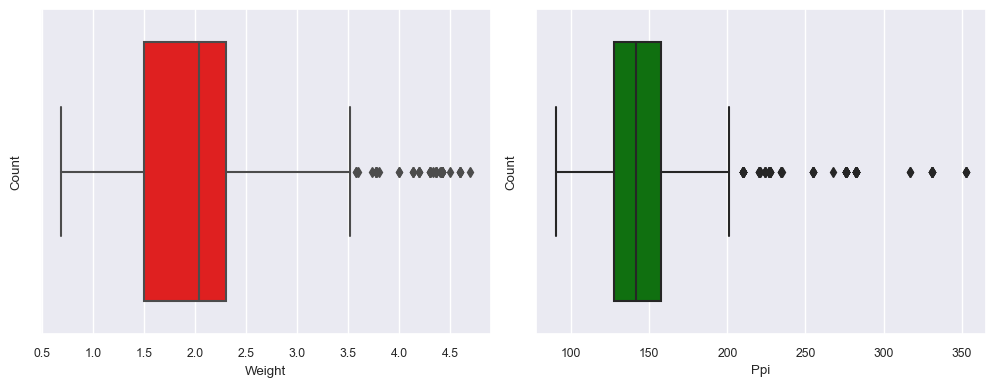

In [49]:
plt.figure(figsize=(15, 15), facecolor='white')
plotnumber = 1

# Define a color palette for the box plots
colors = ['red', 'green', 'blue', 'purple', 'orange', 'pink', 'brown', 'gray', 'cyan', 'magenta', 'teal']

for column in df2:
    if plotnumber < 12:
        plt.subplot(4, 3, plotnumber)
        sns.boxplot(x=data2[column], color=colors[plotnumber - 1])
        plt.xlabel(column)
        plt.ylabel('Count')
    plotnumber += 1

plt.tight_layout()
plt.show()

In [50]:
1273 * 5/100

63.65

In [51]:
# Find IQR
Q1 = df['Weight'].quantile(0.25)
print("Q1 of Weight :",Q1)
Q3 = df['Weight'].quantile(0.75)
print("Q3 of Weight :",Q3)
Q11 = df['Ppi'].quantile(0.25)
print("Q1 of Ppi :",Q1)
Q33 = df['Ppi'].quantile(0.75)
print("Q3 of Ppi :",Q3)

Q1 of Weight : 1.5
Q3 of Weight : 2.31
Q1 of Ppi : 1.5
Q3 of Ppi : 2.31


In [ ]:
# IQR 
IQR1 = Q3 - Q1
print("IQR of Weight :",IQR1)
IQR2 = Q11 - Q33
print("IQR of Ppi :",IQR2)

In [ ]:
# lower limit and upper limit
lower_limit_1 = Q1 - 1.5*IQR1
print("Lower Limit of Weight : ",lower_limit_1)
upper_limit_1 = Q3 + 1.5*IQR1
print("Upper Limit of Weight : ",upper_limit_1)

lower_limit_2 = Q11 - 1.5*IQR2
print("Lower Limit of Ppi : ",lower_limit_2)
upper_limit_2 = Q33 + 1.5*IQR2
print("Upper Limit of Ppi : ",upper_limit_2)

In [ ]:
df.loc[df['Weight']<lower_limit_1]

In [ ]:
df.loc[df['Weight']>upper_limit_1]

In [ ]:
df.loc[df['Weight']>upper_limit_1].count()

In [ ]:
df.Weight.median()

In [ ]:
df.loc[df['Weight']>upper_limit_1,'Weight'] = df.Weight.median()

In [ ]:
df.loc[df['Weight']>upper_limit_1]

In [ ]:
df.loc[df['Ppi']<lower_limit_2]

In [ ]:
df.loc[df['Ppi']<lower_limit_2].count()

In [ ]:
df.loc[df['Ppi']>upper_limit_2].count()

In [ ]:
sns.boxplot(x='Weight',data=df)

### Scaling
- Used only in numerical data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
df[['Weight','Ppi']] = scale.fit_transform(df[['Weight','Ppi']])

In [ ]:
data

In [ ]:
df

In [ ]:
sns.histplot(x='Ppi',data=data,kde=True)

In [ ]:
sns.histplot(x='Weight',data=df,kde=True)

In [ ]:
sns.histplot(x='Price',data=df,kde=True)

<Axes: xlabel='Weight', ylabel='Count'>

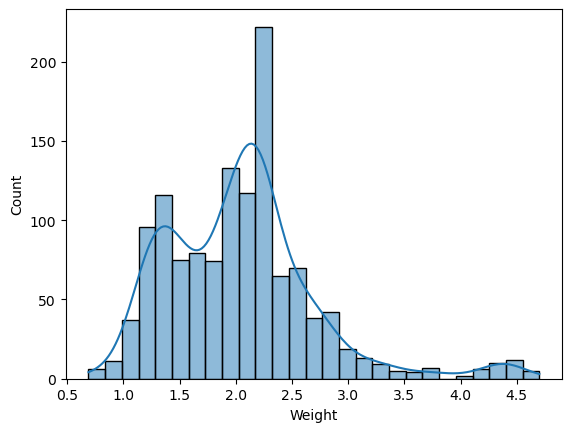

In [29]:
sns.histplot(x='Weight',data=data,kde=True)

<Axes: xlabel='Ppi', ylabel='Count'>

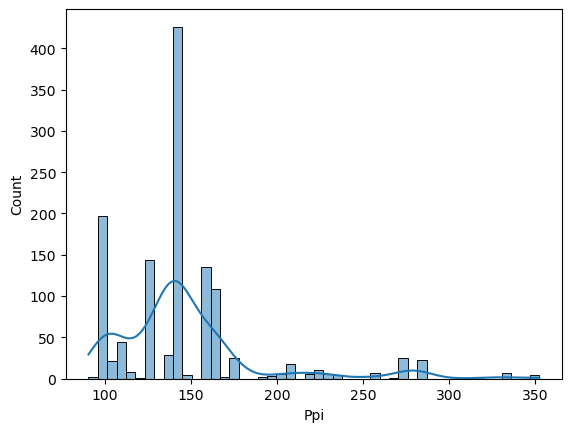

In [30]:
sns.histplot(x='Ppi',data=data,kde=True)

<Axes: xlabel='Ppi', ylabel='Count'>

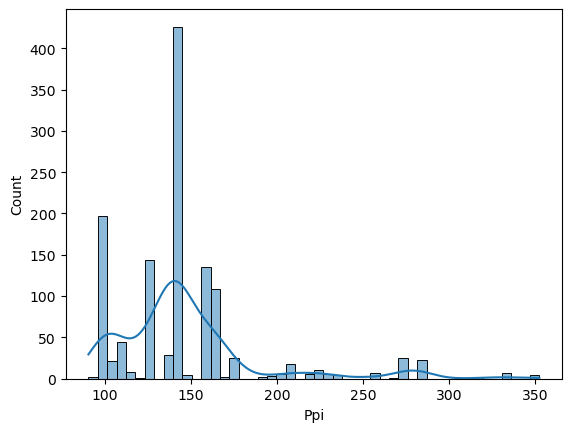

In [31]:
sns.histplot(x='Ppi',data=df,kde=True)

### Encoding
- Convert categorical to numerical 

In [32]:
df.Company.unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [33]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

#### Company

In [34]:
df['Company'] = lb.fit_transform(df['Company'])

In [35]:
data.tail()

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
1268,Asus,Notebook,4,2.20,10.555257,0,0,100.454670,Intel Core i7,500,0,Nvidia,Windows
1269,Lenovo,2 in 1 Convertible,4,1.80,10.433899,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1270,Lenovo,2 in 1 Convertible,16,1.30,11.288115,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1271,Lenovo,Notebook,2,1.50,9.409283,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1272,HP,Notebook,6,2.19,10.614129,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [36]:
df.Company.unique()

array([ 1,  7,  0,  2,  4, 10,  3, 11, 13, 16,  8, 18, 17, 14, 12, 15,  6,
        5,  9])

In [37]:
data.Company.unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [38]:
df.tail()

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
1268,2,Notebook,4,2.20,10.555257,0,0,100.454670,Intel Core i7,500,0,Nvidia,Windows
1269,10,2 in 1 Convertible,4,1.80,10.433899,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1270,10,2 in 1 Convertible,16,1.30,11.288115,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1271,10,Notebook,2,1.50,9.409283,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1272,7,Notebook,6,2.19,10.614129,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [39]:
df['TypeName'] = lb.fit_transform(df['TypeName'])

In [40]:
df['Ram'] = lb.fit_transform(df['Ram'])

In [41]:
df['Cpu_brand'] = lb.fit_transform(df['Cpu_brand'])

In [42]:
df['HDD'] = lb.fit_transform(df['HDD'])

In [43]:
df['SSD'] = lb.fit_transform(df['SSD'])

In [44]:
df['Gpu_brand'] = lb.fit_transform(df['Gpu_brand'])

In [45]:
df['Os'] = lb.fit_transform(df['Os'])

In [46]:
df.head(10)

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,1,4,3,1.37,11.175755,0,1,226.983005,2,0,5,1,0
1,1,4,3,1.34,10.776777,0,0,127.677940,2,0,0,1,0
2,7,3,3,1.86,10.329931,0,0,141.211998,2,0,8,1,1
3,1,4,5,1.83,11.814476,0,1,220.534624,3,0,9,0,0
4,1,4,3,1.37,11.473101,0,1,226.983005,2,0,8,1,0
5,0,3,1,2.10,9.967026,0,0,100.454670,0,3,0,0,2
6,1,4,5,2.04,11.644108,0,1,220.534624,3,0,0,1,0
7,1,4,3,1.34,11.030615,0,0,127.677940,2,0,0,1,0
8,2,4,5,1.30,11.285443,0,0,157.350512,3,0,9,2,2
9,0,4,3,1.60,10.621952,0,1,157.350512,2,0,8,1,2


In [47]:
df

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,1,4,3,1.37,11.175755,0,1,226.983005,2,0,5,1,0
1,1,4,3,1.34,10.776777,0,0,127.677940,2,0,0,1,0
2,7,3,3,1.86,10.329931,0,0,141.211998,2,0,8,1,1
3,1,4,5,1.83,11.814476,0,1,220.534624,3,0,9,0,0
4,1,4,3,1.37,11.473101,0,1,226.983005,2,0,8,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,2,3,1,2.20,10.555257,0,0,100.454670,3,3,0,2,2
1269,10,0,1,1.80,10.433899,1,1,157.350512,3,0,5,1,2
1270,10,0,5,1.30,11.288115,1,1,276.053530,3,0,9,1,2
1271,10,3,0,1.50,9.409283,0,0,111.935204,4,0,0,1,2


# Feature Selection

### Remove unwanted feature

In [48]:
df

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,1,4,3,1.37,11.175755,0,1,226.983005,2,0,5,1,0
1,1,4,3,1.34,10.776777,0,0,127.677940,2,0,0,1,0
2,7,3,3,1.86,10.329931,0,0,141.211998,2,0,8,1,1
3,1,4,5,1.83,11.814476,0,1,220.534624,3,0,9,0,0
4,1,4,3,1.37,11.473101,0,1,226.983005,2,0,8,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,2,3,1,2.20,10.555257,0,0,100.454670,3,3,0,2,2
1269,10,0,1,1.80,10.433899,1,1,157.350512,3,0,5,1,2
1270,10,0,5,1.30,11.288115,1,1,276.053530,3,0,9,1,2
1271,10,3,0,1.50,9.409283,0,0,111.935204,4,0,0,1,2


In [49]:
at = {
    "Cpu_brand": "Cpubrand"
}

# Use the rename method to rename columns
df.rename(columns=at,inplace=True) 

In [50]:
gt = {
    "Gpu_brand": "Gpubrand"
}

# Use the rename method to rename columns
df.rename(columns=gt,inplace=True) 

In [51]:
df

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpubrand,HDD,SSD,Gpubrand,Os
0,1,4,3,1.37,11.175755,0,1,226.983005,2,0,5,1,0
1,1,4,3,1.34,10.776777,0,0,127.677940,2,0,0,1,0
2,7,3,3,1.86,10.329931,0,0,141.211998,2,0,8,1,1
3,1,4,5,1.83,11.814476,0,1,220.534624,3,0,9,0,0
4,1,4,3,1.37,11.473101,0,1,226.983005,2,0,8,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,2,3,1,2.20,10.555257,0,0,100.454670,3,3,0,2,2
1269,10,0,1,1.80,10.433899,1,1,157.350512,3,0,5,1,2
1270,10,0,5,1.30,11.288115,1,1,276.053530,3,0,9,1,2
1271,10,3,0,1.50,9.409283,0,0,111.935204,4,0,0,1,2


### Checking Correaltion

In [52]:
df.corr()

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpubrand,HDD,SSD,Gpubrand,Os
Company,1.000000,0.004771,0.060729,-0.124213,0.138007,0.026601,0.111078,0.063607,0.020801,-0.136585,0.142549,0.037900,0.151201
TypeName,0.004771,1.000000,-0.222454,-0.278201,-0.125323,-0.404642,-0.154436,-0.028607,-0.121751,-0.191451,-0.074978,-0.252406,-0.110645
Ram,0.060729,-0.222454,1.000000,0.320256,0.769917,0.136008,0.235763,0.356303,0.250222,0.016408,0.566865,0.366247,0.135290
Weight,-0.124213,-0.278201,0.320256,1.000000,0.151861,-0.292900,0.023368,-0.319291,-0.053647,0.536423,-0.061873,0.350725,0.086814
Price,0.138007,-0.125323,0.769917,0.151861,1.000000,0.194436,0.279483,0.480621,0.202145,-0.143770,0.663042,0.363883,0.221101
TouchScreen,0.026601,-0.404642,0.136008,-0.292900,0.194436,1.000000,0.136800,0.452313,0.129539,-0.236211,0.192224,-0.043410,0.096557
Ips,0.111078,-0.154436,0.235763,0.023368,0.279483,0.136800,1.000000,0.289112,0.134092,-0.111959,0.226568,0.170353,0.001285
Ppi,0.063607,-0.028607,0.356303,-0.319291,0.480621,0.452313,0.289112,1.000000,0.218191,-0.346007,0.438717,0.075103,0.011847
Cpubrand,0.020801,-0.121751,0.250222,-0.053647,0.202145,0.129539,0.134092,0.218191,1.000000,-0.116292,0.117359,0.339223,-0.050161
HDD,-0.136585,-0.191451,0.016408,0.536423,-0.143770,-0.236211,-0.111959,-0.346007,-0.116292,1.000000,-0.553544,0.148688,-0.004977


<Axes: >

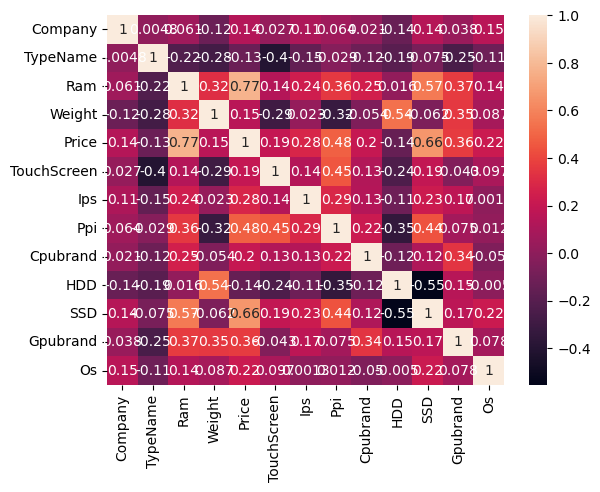

In [53]:
sns.heatmap(data=df.corr(),annot=True)

In [54]:
df

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpubrand,HDD,SSD,Gpubrand,Os
0,1,4,3,1.37,11.175755,0,1,226.983005,2,0,5,1,0
1,1,4,3,1.34,10.776777,0,0,127.677940,2,0,0,1,0
2,7,3,3,1.86,10.329931,0,0,141.211998,2,0,8,1,1
3,1,4,5,1.83,11.814476,0,1,220.534624,3,0,9,0,0
4,1,4,3,1.37,11.473101,0,1,226.983005,2,0,8,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,2,3,1,2.20,10.555257,0,0,100.454670,3,3,0,2,2
1269,10,0,1,1.80,10.433899,1,1,157.350512,3,0,5,1,2
1270,10,0,5,1.30,11.288115,1,1,276.053530,3,0,9,1,2
1271,10,3,0,1.50,9.409283,0,0,111.935204,4,0,0,1,2


## Model Creation

In [55]:
df.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpubrand,HDD,SSD,Gpubrand,Os
0,1,4,3,1.37,11.175755,0,1,226.983005,2,0,5,1,0
1,1,4,3,1.34,10.776777,0,0,127.677940,2,0,0,1,0
2,7,3,3,1.86,10.329931,0,0,141.211998,2,0,8,1,1
3,1,4,5,1.83,11.814476,0,1,220.534624,3,0,9,0,0
4,1,4,3,1.37,11.473101,0,1,226.983005,2,0,8,1,0


#### Define x(input) and y(target/output) 

In [56]:
X = df[['Company', 'TypeName', 'Ram', 'Weight', 'TouchScreen', 'Ips',
       'Ppi', 'Cpubrand', 'HDD', 'SSD', 'Gpubrand', 'Os']]

In [57]:
X

,Company,TypeName,Ram,Weight,TouchScreen,Ips,Ppi,Cpubrand,HDD,SSD,Gpubrand,Os
0,1,4,3,1.37,0,1,226.983005,2,0,5,1,0
1,1,4,3,1.34,0,0,127.677940,2,0,0,1,0
2,7,3,3,1.86,0,0,141.211998,2,0,8,1,1
3,1,4,5,1.83,0,1,220.534624,3,0,9,0,0
4,1,4,3,1.37,0,1,226.983005,2,0,8,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1268,2,3,1,2.20,0,0,100.454670,3,3,0,2,2
1269,10,0,1,1.80,1,1,157.350512,3,0,5,1,2
1270,10,0,5,1.30,1,1,276.053530,3,0,9,1,2
1271,10,3,0,1.50,0,0,111.935204,4,0,0,1,2


In [58]:
y = df.Price

In [59]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1268    10.555257
1269    10.433899
1270    11.288115
1271     9.409283
1272    10.614129
Name: Price, Length: 1272, dtype: float64

#### Split x and y into training and testing

In [60]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=15)

In [61]:
X_train.shape

(1017, 12)

In [62]:
X_test.shape

(255, 12)

In [63]:
y_train.shape

(1017,)

In [64]:
y_test.shape

(255,)

### Model Selection

#### Linear Regression

#### SVR 

In [65]:
from sklearn.svm import SVR
SV_regressor = SVR()
SV_regressor.fit(X_train,y_train)

SVR()

In [66]:
y_pred=SV_regressor.predict(X_test)

In [67]:
y_pred # predicted value

array([10.11338254, 10.70329052, 10.12458787, 10.50759643, 11.05789462,
       11.14221997, 10.83272808, 10.71180699, 10.67553397, 10.22094241,
       10.46645268, 10.86575362, 10.57296253, 10.59825706, 10.16046692,
       10.29444489, 11.15314788, 10.86632985, 11.08181502, 10.90373982,
       10.70732553, 10.96052069, 10.4301532 , 11.21389038, 11.14219558,
       10.79382706, 10.81654138, 11.19828718, 10.96780881, 10.2148846 ,
       11.119983  , 10.98307673, 10.98731806, 10.10043448, 10.53439437,
       11.14735007, 10.41325796, 11.02926371, 10.38878305, 10.1324374 ,
       10.1050967 , 10.60946293, 10.51748732, 10.90623857, 11.55680478,
       11.39394507, 11.05181418, 10.56764232, 11.0878378 , 10.9666767 ,
       10.91652391, 10.19021719, 10.70728083, 10.87317775, 10.95023394,
       10.12007747, 10.91026473, 10.25231853, 10.74081011, 10.8342233 ,
       10.22237656, 10.11213184, 10.84779708, 10.13131614, 10.33735312,
       10.92516586, 11.4432542 , 11.03739777, 10.99753707, 11.24

In [68]:
y_test # actual value

612     10.071160
237     10.329931
338      9.592296
501     10.403650
427     10.977717
          ...    
1194    11.166237
936     10.300995
687     10.277575
302     10.450994
80      10.975129
Name: Price, Length: 255, dtype: float64

## Model Evaluation

In [69]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [70]:
r2_score(y_pred,y_test)

0.09312568042112968

### Hyperparameter Tuning

In [71]:
# gridsearch cv
from sklearn.model_selection import GridSearchCV
# define hyperparameter range
param_grid = {
    'C': [0.1, 1, 10, 100],   # Range of regularization parameter C
    'gamma': [0.001, 0.01, 0.1, 1],  # Range of the kernel coefficient for 'rbf' kernel
    'epsilon': [0.01, 0.1, 0.2]  # Range of the epsilon parameter
}
model=SVR()
grid=GridSearchCV(SV_regressor,param_grid,verbose=2,scoring="r2",cv=5)
grid.fit(X,y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END ...................C=0.1, epsilon=0.01, gamma=0.001; total time=   0.0s
[CV] END ...................C=0.1, epsilon=0.01, gamma=0.001; total time=   0.0s
[CV] END ...................C=0.1, epsilon=0.01, gamma=0.001; total time=   0.0s
[CV] END ...................C=0.1, epsilon=0.01, gamma=0.001; total time=   0.3s
[CV] END ...................C=0.1, epsilon=0.01, gamma=0.001; total time=   0.0s
[CV] END ....................C=0.1, epsilon=0.01, gamma=0.01; total time=   0.0s
[CV] END ....................C=0.1, epsilon=0.01, gamma=0.01; total time=   0.0s
[CV] END ....................C=0.1, epsilon=0.01, gamma=0.01; total time=   0.0s
[CV] END ....................C=0.1, epsilon=0.01, gamma=0.01; total time=   0.0s
[CV] END ....................C=0.1, epsilon=0.01, gamma=0.01; total time=   0.0s
[CV] END .....................C=0.1, epsilon=0.01, gamma=0.1; total time=   0.0s
[CV] END .....................C=0.1, epsilon=0.

[CV] END .......................C=1, epsilon=0.2, gamma=0.01; total time=   0.0s
[CV] END .......................C=1, epsilon=0.2, gamma=0.01; total time=   0.0s
[CV] END .......................C=1, epsilon=0.2, gamma=0.01; total time=   0.0s
[CV] END .......................C=1, epsilon=0.2, gamma=0.01; total time=   0.0s
[CV] END .......................C=1, epsilon=0.2, gamma=0.01; total time=   0.0s
[CV] END ........................C=1, epsilon=0.2, gamma=0.1; total time=   0.0s
[CV] END ........................C=1, epsilon=0.2, gamma=0.1; total time=   0.0s
[CV] END ........................C=1, epsilon=0.2, gamma=0.1; total time=   0.0s
[CV] END ........................C=1, epsilon=0.2, gamma=0.1; total time=   0.0s
[CV] END ........................C=1, epsilon=0.2, gamma=0.1; total time=   0.0s
[CV] END ..........................C=1, epsilon=0.2, gamma=1; total time=   0.0s
[CV] END ..........................C=1, epsilon=0.2, gamma=1; total time=   0.0s
[CV] END ...................

[CV] END .....................C=100, epsilon=0.1, gamma=0.01; total time=   0.2s
[CV] END .....................C=100, epsilon=0.1, gamma=0.01; total time=   0.1s
[CV] END .....................C=100, epsilon=0.1, gamma=0.01; total time=   0.1s
[CV] END ......................C=100, epsilon=0.1, gamma=0.1; total time=   0.0s
[CV] END ......................C=100, epsilon=0.1, gamma=0.1; total time=   0.0s
[CV] END ......................C=100, epsilon=0.1, gamma=0.1; total time=   0.0s
[CV] END ......................C=100, epsilon=0.1, gamma=0.1; total time=   0.0s
[CV] END ......................C=100, epsilon=0.1, gamma=0.1; total time=   0.0s
[CV] END ........................C=100, epsilon=0.1, gamma=1; total time=   0.0s
[CV] END ........................C=100, epsilon=0.1, gamma=1; total time=   0.0s
[CV] END ........................C=100, epsilon=0.1, gamma=1; total time=   0.0s
[CV] END ........................C=100, epsilon=0.1, gamma=1; total time=   0.0s
[CV] END ...................

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100], 'epsilon': [0.01, 0.1, 0.2],
                         'gamma': [0.001, 0.01, 0.1, 1]},
             scoring='r2', verbose=2)

In [72]:
import sklearn
sklearn.metrics.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

In [73]:
best_params = grid.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'C': 100, 'epsilon': 0.2, 'gamma': 0.01}


In [74]:
best_model = grid.best_estimator_

In [75]:
best_model

SVR(C=100, epsilon=0.2, gamma=0.01)

In [76]:
SV_regressor=SVR(C=100,gamma=0.01,epsilon=0.2)
SV_regressor.fit(X_train,y_train)

SVR(C=100, epsilon=0.2, gamma=0.01)

In [77]:
y_pred=SV_regressor.predict(X_test)

In [78]:
r2_score(y_pred,y_test)

0.8361052458809772

In [79]:
import pickle
# open a file, where you ant to store the data
file = open('regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(SV_regressor, file)

In [80]:
pwd

'C:\\Users\\rajee\\Data_science\\Class\\ml\\Prac\\Laptop Prediction'